In [72]:
import numpy as np
import random
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt

In [38]:
X, y = make_blobs(n_samples=100, n_features=2, centers=5, random_state=0)

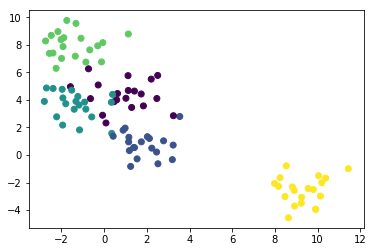

In [40]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [41]:
from sklearn.cluster import KMeans

In [58]:
model = KMeans(5)

In [59]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [60]:
model.labels_

array([4, 1, 1, 1, 2, 4, 2, 1, 0, 2, 4, 2, 1, 0, 3, 2, 1, 1, 4, 0, 1, 3,
       2, 3, 1, 0, 4, 3, 2, 0, 0, 1, 4, 4, 3, 3, 0, 3, 0, 0, 0, 2, 1, 4,
       0, 0, 3, 4, 2, 4, 1, 4, 4, 0, 3, 4, 0, 1, 2, 1, 3, 4, 0, 4, 0, 4,
       3, 4, 1, 2, 1, 4, 4, 4, 4, 1, 2, 0, 3, 2, 0, 2, 2, 1, 1, 3, 3, 3,
       0, 1, 3, 3, 1, 3, 0, 2, 2, 3, 3, 1], dtype=int32)

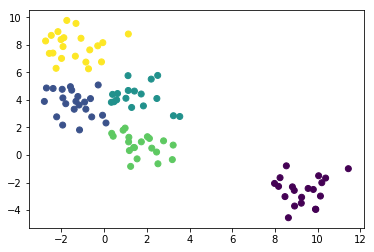

In [61]:
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)

# for cluster in model.cluster_centers_:
#     plt.scatter(cluster[0], cluster[1], s=100)

In [62]:
colors = ["red", "green", "blue", "yellow", "black"]

In [64]:
clr = [colors[item] for item in model.labels_]

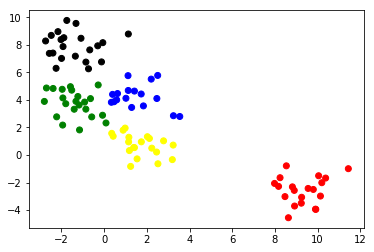

In [65]:
plt.scatter(X[:, 0], X[:, 1], c=clr)

In [71]:
class Cluster:
    
    def __init__(self, name, center):
        self.name = name
        self.center = center
        self.points = []
        
    def relocate(self):
        self.center = np.mean(self.points, axis=0)
        self.points.clear()
    
    def distance(self, point):
        return np.sqrt(((self.center - point) ** 2).sum())

In [88]:
class KMeansCustom:
    
    def __init__(self, n_clusters=8): 
        self.n_clusters = n_clusters
        
    def fit(self, X):
        
        # create n clusters
        clusters = []
        for i in range(self.n_clusters):
            cluster = Cluster(i, random.choice(X))
            clusters.append(cluster)
            
        
        # repeat max_iter times
        for i in range(100):
            
            labels = []
            # get a vote from every point
            for point in X:
                list_dist = []
                # point voting for clusters
                for cluster in clusters:
                    distance = cluster.distance(point)
                    list_dist.append((distance, cluster.name))
                    
                # selected clusted decided
                sel_dist, sel_cluster_name = sorted(list_dist)[0]
                sel_cluster = clusters[sel_cluster_name]
                sel_cluster.points.append(point)
                labels.append(sel_cluster_name)
            
            # readjust the centers
            for cluster in clusters:
                cluster.relocate()
                
        self.cluster_centers_ = [cluster.center for cluster in clusters]
        self.labels_ = labels
                
        

In [98]:
model = KMeansCustom(5)

In [99]:
model.fit(X)

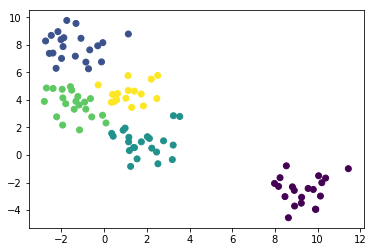

In [100]:
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
